**Multimedia Privacy and Security - TP1 Basic Image Processing - Genis Skura**
# 1. Introduction



The size of the image:  2509056 total pixels


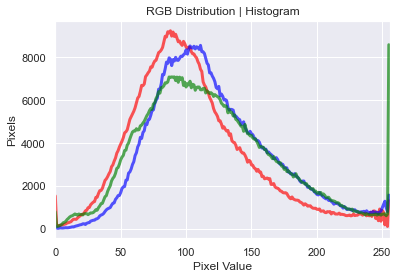

In [43]:
# Reading & Histogram of the given image
import numpy as np
import cv2 as cv
import skimage
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
sns.set()

img = cv.imread('peacock.jpg')
colors = ['red', 'blue', 'green']
display(Image(filename='peacock.jpg', width=700, height=500))
print('The size of the image: ', img.size, 'total pixels')

# For each one of the three colors
for i, color in enumerate(colors):
    histogram1 = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram1, color = color, linewidth = 3, alpha = 0.66)
    plt.xlim([0,256])
    plt.title('RGB Distribution | Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Pixels')
plt.show()

We can see from the histogram a kind of balanced distribution between the two channels of blue & red in all areas of the image. However, green dominates in intensity as seen in the outlier on the histogram with the highest amount of pixels equal to values of 250+. This can be understood just by looking at the image since the peacock is green and we expect pixels with green as their most intense color to be the majority.

## Global and Local Statistics (Mean, Varinace)

In [44]:
# Grayscale , Mean, Variance

# gray_peacock = cv.imread('peacock.jpg', 1)
gray_peacock = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_mean = np.mean(gray_peacock)
img_var = np.var(gray_peacock)
print('The Global Mean of the Image: ', img_mean)
print('The Global Variance of the Image: ', img_var)

# cv.imwrite('grayscale_peacock.jpg', gray_peacock)
# display(Image(filename='grayscale_peacock.jpg'))


downsample_function = np.min # Downsampled using 'min' since it really distinguishes himself from the grayscale image
new_img = skimage.measure.block_reduce(gray_peacock, block_size=2, func=downsample_function)
print('The Local Mean of the Reduced Image: ', np.mean(new_img))
print('The Local Variance of the Reduced Image: ', np.var(new_img))
print('Reduced Shape: ', new_img.shape, 'Original Shape: ', gray_peacock.shape)
print('Grayscale Size: ', gray_peacock.size, ' | Reduced Image Size: ', new_img.size)

# cv.imshow('Original image',img)
# cv.imshow('Grayscale image', gray_peacock)
# cv.imshow('Reduced Image ({})'.format(downsample_function.__name__), new_img)
# cv.waitKey(0)
# cv.destroyAllWindows()

The Global Mean of the Image:  118.77675548094582
The Global Variance of the Image:  2138.1365702390885
The Local Mean of the Reduced Image:  90.34081343740435
The Local Variance of the Reduced Image:  1163.0420284016805
Reduced Shape:  (396, 528) Original Shape:  (792, 1056)
Grayscale Size:  836352  | Reduced Image Size:  209088


### Histogram & Plots

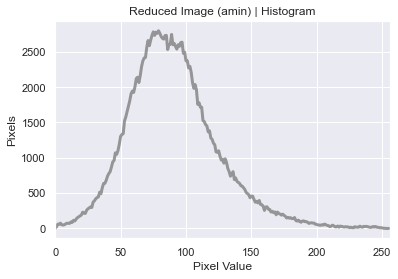

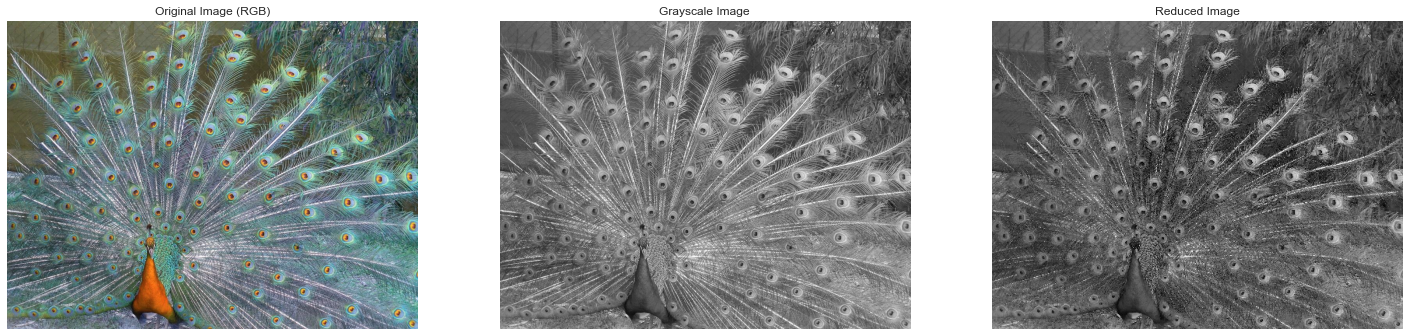

In [45]:
histogram2 = cv.calcHist([new_img], [0], None, [256], [0, 256])
plt.plot(histogram2, color='gray', linewidth = 3, alpha = 0.8)
plt.xlim([0,256])
plt.title('Reduced Image ({}) | Histogram'.format(downsample_function.__name__))
plt.xlabel('Pixel Value')
plt.ylabel('Pixels')
plt.show()

#~~~~~~~~~~# 

fig1 = plt.figure(figsize=(25, 10))
ax_1 = fig1.add_subplot(1, 3, 1)
ax_1.set_title('Original Image (RGB)')
ax_1 = plt.imshow(img)

ax_2 = fig1.add_subplot(1, 3, 2)
ax_2.set_title('Grayscale Image')
ax_2 = plt.imshow(gray_peacock, cmap='gray')

ax_3 = fig1.add_subplot(1, 3, 3)
ax_3.set_title('Reduced Image')
ax_3 = plt.imshow(new_img, cmap='gray')

for ax in fig1.axes:
    ax.axis('off')
    ax.grid(False)


As seen from the histogram the majority of the pixels were centered around ~90 - ~110 combined with the green pixels of high value, hence the global mean of ~118.
The local mean and variance of the downsampled image using skimage's block_reduce() function are also displayed. The mean is smaller (~90) because of the **numpy.min()** function used to downsample according to it. This can be seen from the histogram too, where the highest number of values are centered around ~90 with a minimal number of pixels having a high value.

I used this type of min pooling in this case since it creates a better idea of the pixels with the lowest value in our original image when displaying this reduced image and comparing them.

# 2. Noise

Genis MSE:  1791.1345139366508
REAL LIBRARY MSE:  1791.1345139367156


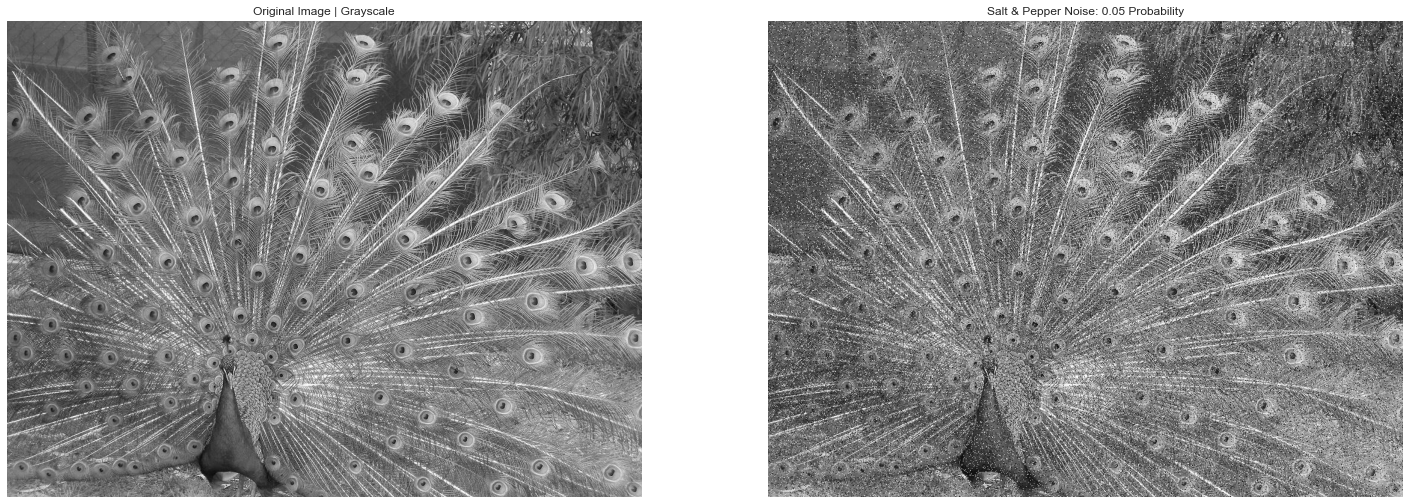

In [46]:
# Additive White Gaussian Noise & Salt and Pepper
def additive_white_noise(image, variance):
    white_noise =  np.sqrt(variance) * np.random.randn(image.shape[0], image.shape[1]) + 0 # white noise is ok
    noizy_img = util.img_as_float(image) + white_noise    # 
    return util.img_as_ubyte(np.clip(noizy_img, -1, 1))   # np.clip to limit the float values of the array only [-1 to 1] for conversion to uint8 [0, 255]

def salt_pepper_noise(p, q, image):
    # if (s_max > 255) or (s_min < 0):
    #     raise ValueError('Pixel value cant be higher than 255 or negative')
    noizy_img = np.copy(image)
    s_min = np.min(image)
    s_max = np.max(image)
    
    for i in range(0, noizy_img.shape[0]):
        for j in range(0, noizy_img.shape[1]):
            r = np.random.rand(1)
            if r < p:
                noizy_img[i][j] = s_min
                continue
            r = np.random.rand(1)
            if r < q:
                noizy_img[i][j] = s_max
                continue
    return noizy_img

from skimage.metrics import mean_squared_error as mn2
def mean_squared_error(image1, image2):
    if image1.shape != image2.shape:
        raise TypeError('Images dont have the same shape: {}, {}'.format(image1.shape, image2.shape))
    height = image1.shape[0]
    width = image1.shape[1]
    k = height * width
    distances = 0.0
    for i in range(0, height):
        for j in range(0, width):
            distances += ((int(image2[i][j]) - int(image1[i][j]))**2) / k
    return distances


salty_image = salt_pepper_noise(0.05, 0.05, gray_peacock)
print('Genis MSE: ', mean_squared_error(salty_image, gray_peacock))
print('REAL LIBRARY MSE: ', mn2(salty_image, gray_peacock))


fig = plt.figure(figsize=(25, 25))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title('Original Image | Grayscale')
ax2.set_title('Salt & Pepper Noise: 0.05 Probability')
ax1.imshow(gray_peacock, cmap='gray')
ax2.imshow(salty_image, cmap='gray')
ax1.grid(visible=None)
ax1.axis('off')
ax2.grid(visible=None)
ax2.axis('off')
plt.show()

#### Mapping Image to Double (skimage.img_as_float())

In [47]:
# Mapping to double, MSE Differences
img2 = cv.imread('grayscale_peacock.jpg')
img_as_double = skimage.img_as_float(gray_peacock)
# img_as_double = img2.astype(np.double) / np.max(img2)

print('MSE between original image and image mapped to double: ', mean_squared_error(gray_peacock, img_as_double))
print('Official Library MSE: ', mn2(gray_peacock, img_as_double))

# cv.imshow('Original Image', img2)
# cv.imshow('Image as Double', img_as_double)
# cv.waitKey(0)
# cv.destroyAllWindows()

MSE between original image and image mapped to double:  16245.981181357576
Official Library MSE:  16118.884022979804


Even though the original image formatted as *uint8* and its mapping *double* don't seem to have any differences when looked through the human eye, the MSE between them is massive. This is expected since on a pixel level, completely different values from two different values are found. One being [0...255] and the other [0, 1]. And when computing the sums of differences on a pixel level, we expect to get a large mean squared error.

#### Peak Signal to Noise Ratio

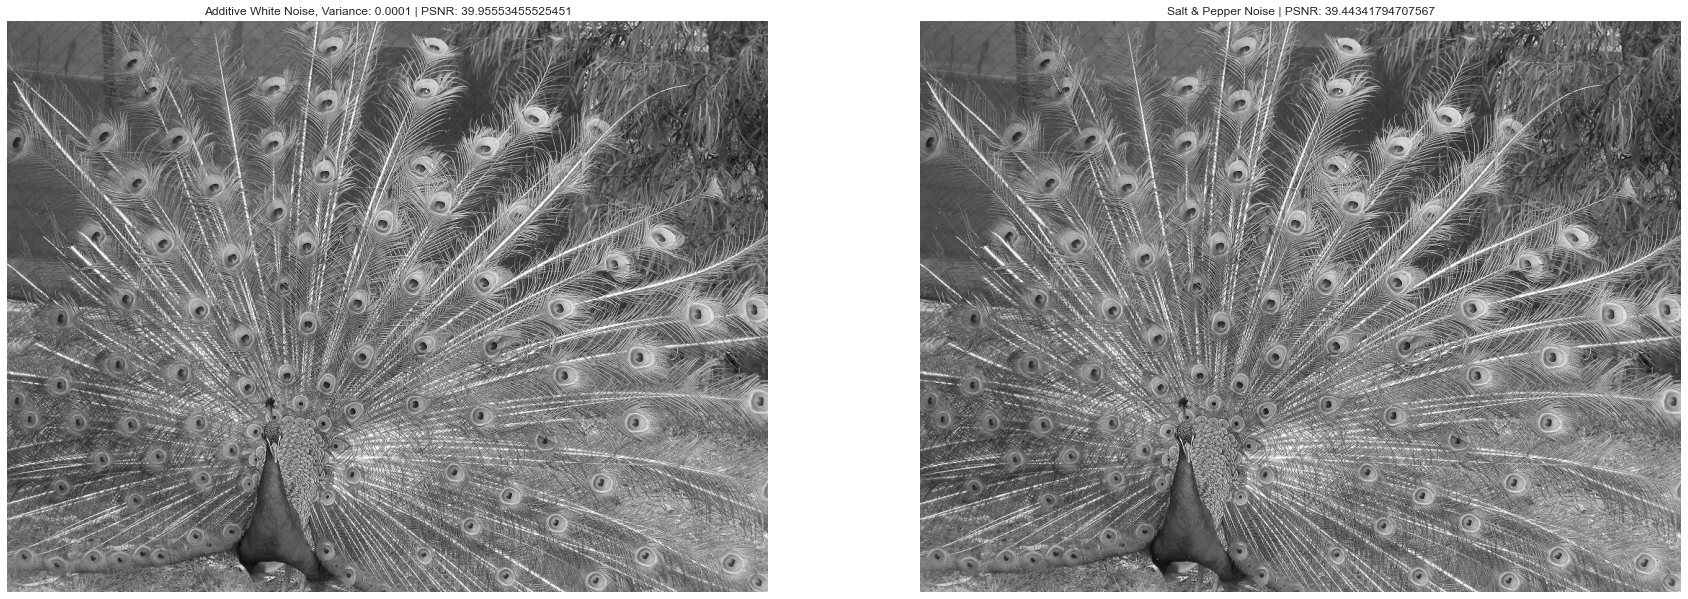

In [48]:
# Peak Signal to Noise Ratio
from skimage.metrics import peak_signal_noise_ratio
from skimage import util

def psnr(image1, image2):
    ratio = 10 * np.log10(np.max(image1)**2 / mean_squared_error(image1, image2))
    # print('Peak Signal to Noise Ratio: {} dB'.format(ratio))
    return ratio

variance_levels = [0.0001, 0.001, 0.01, 0.1]
psnr_level = 0
salty_image2 = salt_pepper_noise(0.0002, 0.0002, gray_peacock)

# Plotting Purposes
noizy_images = []
psnr_levels = []

for v in variance_levels:
    white_noizy_image = additive_white_noise(gray_peacock, v)
    psnr_level = psnr(gray_peacock, white_noizy_image)
    
    psnr_levels.append(psnr_level)
    noizy_images.append(white_noizy_image)
    # cv.imshow('Additive White Noise, Variance: {} | PSNR: {}'.format(v, int(psnr_level)), white_noizy_image)

# cv.imshow('Salt & Pepper | PSNR: {}'.format(int(psnr(gray_peacock, salty_image2))), salty_image2)
# cv.waitKey(0)
# cv.destroyAllWindows()


fig2 = plt.figure(figsize=(30, 30))
ax1_1 = fig2.add_subplot(1, 2, 1)
ax2_2 = fig2.add_subplot(1, 2, 2)
ax1_1.set_title('Additive White Noise, Variance: {} | PSNR: {}'.format(variance_levels[0], psnr_levels[0]))
ax2_2.set_title('Salt & Pepper Noise | PSNR: {}'.format(psnr(gray_peacock, salty_image2)))
ax1_1.imshow(noizy_images[0], cmap='gray')
ax2_2.imshow(salty_image2, cmap='gray')
ax1_1.grid(visible=None)
ax1_1.axis('off')
ax2_2.grid(visible=None)
ax2_2.axis('off')
plt.show()


From the calculation of **PSNR** as the weight of the noise compared to the maximum value of our pixels, I could relate its values to the reconstruction quality of the image. The higher the dBs of the PSNR, the higher the reconstruction quality of the image, with our highest value of 40dB having a noise almost *undetectable* by the human eye. We could definitely say that a noise that produces a PSNR value of 35+ still is undetectable on the image while a value of 10 or lower is related to an image almost fully noisy.

By looking at both images that had the highest PSNR (~40) but two different types of noises applied to them, Additive White Gaussian and Salt & Pepper, we could say that the difference is noticeable. Even though the probabilities to change pixels to salt or pepper values was minimal (~0.0002), those pixels that ended up being changed are easily detectable when comparing the two images while in the case of AWGN it was undetectable so we can assume that it leads to a better reconstruction quality overall.

#### Plotting of the Histograms & Images

In [49]:
fig = plt.figure(figsize=(25, 10))
for i in range(0, len(noizy_images)):
    ax1 = fig.add_subplot(2, 4, i + 1)
    ax2 = fig.add_subplot(2, 4, i + 5)
    ax1.set_title('Histogram | AWN | PSNR: {}'.format(int(psnr_levels[i])))
    ax2.set_title('Image | PSNR: {}'.format(psnr_levels[i]))
    histogram = cv.calcHist([noizy_images[i]], [0], None, [256], [0, 256])
    ax1.plot(histogram, color='gray', linewidth = 3, alpha = 0.8)
    ax2.imshow(noizy_images[i], cmap='gray')
    ax2.grid(visible=None)
    ax2.axis('off')
plt.show()

Just by looking at the histograms we could say that when variance of the noise increases, PSNR decreases leading to a noisier image. Images with good reconstruction quality and high PSNR values have a normal distribution (similar and closest to the original Grayscale image) with most of the pixel values centered around the mean. As the level of noise increases the pixel values move towards both extremes *(black and white, salt and pepper)* and the noise is more noticeable since the average intensity of the image moves towards those values with the last histogram being an extreme representation of this.

# 3. Identification
Implementation of hamming distances and the probability of error between an image and another image (usually the original vs noizy). The implementation of the simple hashing based on the local mean values of sub-images (in our case 8 of them 32x32) in comparison to the global mean of the image. The goal is to create noizy copies of the images that produce produce a PSNR of ~35 (which leaves the image still very much detectable by the human eye) and compare hashes and the distributions of the probabilities of error based on that.

In [50]:
# Hamming Distances & Probability of Error
import os
from skimage.util.shape import view_as_blocks


def simple_hash(image, block_size):
    if(len(image.shape) > 2):
        raise TypeError('Convert the image to Grayscale before applying the hash')
    block_number = int(image.shape[0] / block_size)
    image2 = view_as_blocks(image, block_shape=(block_size, block_size))
    global_mean = np.mean(image)
    
    means = []
    the_digest = []

    for i in range(0, block_number):
        for j in range(0, block_number):
            means.append(np.mean(image2[i][j]))
            if np.mean(image2[i][j]) > global_mean:
                the_digest.append(0)
            else:
                the_digest.append(1)
    # print(the_digest, len(the_digest))
    return the_digest


def error_proba(digest1, digest2):
    if (len(digest1) != len(digest2)):
        raise ValueError('Digests dont have the same length')
    hamming = sum((digest1[i] ^ digest2[i] for i in range(len(digest1))))
    return hamming / len(digest1)


def hash_directory(path, size):
    hashes = []
    noizy_hashes = []
    total_psnr = []
    for (_, _, im) in os.walk(path):
        for i in range(0, len(im)):
            grayscale_i = cv.cvtColor(cv.imread(path + im[i]), cv.COLOR_BGR2GRAY)
            noizy_grayscale_i = additive_white_noise(grayscale_i, 0.00025)
            total_psnr.append(psnr(grayscale_i, noizy_grayscale_i))
            
            hashes.append(simple_hash(grayscale_i, size))
            noizy_hashes.append(simple_hash(noizy_grayscale_i, size))
    print('Mean PSNR of all 200 images (Target: ~35) :', np.mean(total_psnr), ' Max: ', np.max(total_psnr), ' Min: ', np.min(total_psnr))
    return hashes, noizy_hashes


# 0.00025 best variance to get PSNR ~ 35
block_s = 32
path = 'images/dct_db/'
original_hashes, noizy_hashes = hash_directory(path, block_s)


Mean PSNR of all 200 images (Target: ~35) : 35.90872262802316  Max:  37.08635929962596  Min:  33.34619885107856


## Inter and Intra Class PMFs
Instead of the matrix multiplication, I computed and compared the probabilities of errors on an intra and inter class basis. Intra being the original image vs the same image but with the addition of noise while inter being a comparison between different images alltogether (one image up against its next). 

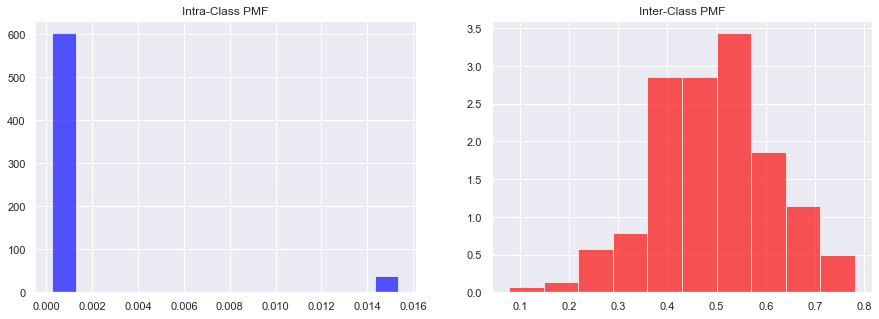

In [51]:
 # Calculated using the probabilities of errors between the original set and noizy set of 256x256 images
p_errors_intra = []
p_errors_inter = []

for i in range(0, len(original_hashes)):
    p_error1 = error_proba(original_hashes[i], noizy_hashes[i])
    p_errors_intra.append(p_error1)


for i in range(0, len(original_hashes) - 1):
    p_error2 = error_proba(original_hashes[i], noizy_hashes[i + 1])
    p_errors_inter.append(p_error2)    


fig3 = plt.figure(figsize=(15, 5))
ax1_3 = fig3.add_subplot(1, 2, 1)
ax2_3 = fig3.add_subplot(1, 2, 2)
ax1_3.set_title('Intra-Class PMF')
ax2_3.set_title('Inter-Class PMF')
ax1_3.hist(p_errors_intra, density=True, histtype='bar', alpha=0.66, rwidth=0.66, color='blue')
ax2_3.hist(p_errors_inter, density=True, histtype='bar', alpha=0.66, color='red')
# plt.xlabel('Probability of Error Between Pairs')
plt.show()

*Remarks*: When we're talking about adding a noise level that produces a PSNR of ~35 which doesn't distort the image that much, we could see that the probability of error (**intra-class**) between the original images and those same images but with the addition of the noise is 0.0 in the majority of cases meaning even just 1 bit flip didn't occur. The inequality between the local and global means didn't change with the addition of the noise except for a small number of the pixels.

However if we compare completely different images (**inter-class between originals or noisy**), we could see that the histogram of the probability mass function of the probabilities of errors in this case differs from the one of the intra-class. More probability of error values are centered towards (0.4 ~ 0.6). As expected, small values of probability of error are rare since we are comparing different classes. In the end, the differences between the probabilities of error produce a normal distribution.